# Caderno de Análise dos Dados II - Internet e Enem no ano de 2019:

In [46]:
library(tidyverse)
library(repr)

#### Carregamento dos Dados Pré Processados e unificados em uma única tabela :

In [2]:
complete_data = read.csv("data/integrated_processed_enem_anatel_ibge_2019.csv")

#### Conversão dos tipos de dados quantitativos - Inteiros para Numéricos:

In [3]:
# conversão dos tipos de dados 
# 1 - inteiros (int) para numéricos (num) - Dados de acesso a internet - Anatel
complete_data[5:19] = sapply(complete_data[5:19], as.numeric)

#### Sumarização por soma dos dados de acesso a internet em banda larga-fixa para um único valor total (densidade_total_internet_fixa):

In [4]:
complete_data_with_totalnet = complete_data %>%
    group_by(cod_municipio_ibge) %>%
    summarise(densidade_total_internet_fixa = fibra_optica + wifi + ethernet + lte + vsatelite + wimax + plc_eletrico + xdsl + cable_modem 
            + fwa_5g_fixed + atm_backbone + dth_satelite + hfc_tv_cabo + fr_frame_relay + mmds) %>%
    merge(complete_data, by.y = "cod_municipio_ibge" ) %>%
    data.frame()
    

#### Reordenamento das posições das variáveis no data frame (Features, Labels)

In [5]:
complete_data_with_totalnet = complete_data_with_totalnet %>%
    select(cod_municipio_ibge, NO_MUNICIPIO_RESIDENCIA, UF,fibra_optica, wifi, ethernet, lte, vsatelite ,wimax , plc_eletrico,
        xdsl, cable_modem, fwa_5g_fixed, atm_backbone, dth_satelite, hfc_tv_cabo, fr_frame_relay, mmds,
        densidade_total_internet_fixa, remuneracao_media, desvio_padrao, gini, pib, pib_p_capta, media_idhm,
        mean_grades_group_cities)

#### Tabela dos Dados 

In [6]:
complete_data_with_totalnet

cod_municipio_ibge,NO_MUNICIPIO_RESIDENCIA,UF,fibra_optica,wifi,ethernet,lte,vsatelite,wimax,plc_eletrico,...,fr_frame_relay,mmds,densidade_total_internet_fixa,remuneracao_media,desvio_padrao,gini,pib,pib_p_capta,media_idhm,mean_grades_group_cities
1100015,Alta Floresta D'Oeste,RO,0,0,3,0,0,0,0,...,2,0,244,2030.28,5653.47,0.472,495628767,21600.73,0.6440385,493.0098
1100023,Ariquemes,RO,0,0,47,0,0,0,0,...,3,0,58,2030.28,5653.47,0.472,2578829725,23908.38,0.6440385,491.6424
1100031,Cabixi,RO,3,129,2,0,3,0,0,...,0,0,212,2030.28,5653.47,0.472,139959390,26347.78,0.6440385,479.7566
1100049,Cacoal,RO,0,0,0,0,0,0,0,...,6,0,6,2030.28,5653.47,0.472,2260643565,26483.95,0.6440385,497.1760
1100056,Cerejeiras,RO,0,0,0,0,0,0,0,...,4,0,648,2030.28,5653.47,0.472,506854457,31051.55,0.6440385,493.3808
1100064,Colorado do Oeste,RO,0,618,0,0,0,0,0,...,3,0,1145,2030.28,5653.47,0.472,334851274,21083.70,0.6440385,495.0767
1100072,Corumbiara,RO,5,108,3,0,0,0,0,...,0,0,272,2030.28,5653.47,0.472,349247369,47253.06,0.6440385,481.5953
1100080,Costa Marques,RO,0,0,0,0,0,0,0,...,1,0,1,2030.28,5653.47,0.472,238768544,13025.40,0.6440385,461.0516
1100098,Espigão D'Oeste,RO,0,0,5,0,4,0,0,...,1,0,564,2030.28,5653.47,0.472,624760162,19298.21,0.6440385,494.1589
1100106,Guajará-Mirim,RO,0,0,26,0,0,0,0,...,5,0,1912,2030.28,5653.47,0.472,892883182,19337.36,0.6440385,465.0481


#### Estrutura dos Dados (Features e Label)

In [7]:
str(complete_data_with_totalnet)

'data.frame':	5570 obs. of  26 variables:
 $ cod_municipio_ibge           : int  1100015 1100023 1100031 1100049 1100056 1100064 1100072 1100080 1100098 1100106 ...
 $ NO_MUNICIPIO_RESIDENCIA      : Factor w/ 5299 levels "Abadia de Goiás",..: 128 367 780 814 1156 1247 1356 1361 1622 1898 ...
 $ UF                           : Factor w/ 27 levels "AC","AL","AM",..: 21 21 21 21 21 21 21 21 21 21 ...
 $ fibra_optica                 : num  0 0 3 0 0 0 5 0 0 0 ...
 $ wifi                         : num  0 0 129 0 0 618 108 0 0 0 ...
 $ ethernet                     : num  3 47 2 0 0 0 3 0 5 26 ...
 $ lte                          : num  0 0 0 0 0 0 0 0 0 0 ...
 $ vsatelite                    : num  0 0 3 0 0 0 0 0 4 0 ...
 $ wimax                        : num  0 0 0 0 0 0 0 0 0 0 ...
 $ plc_eletrico                 : num  0 0 0 0 0 0 0 0 0 0 ...
 $ xdsl                         : num  239 0 75 0 644 524 156 0 553 1880 ...
 $ cable_modem                  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ fwa_5g_f

## Comportamento da variável "alvo" ou "label" ou "y" - mean_grades_group_cities
### - Média das Notas do Enem por Município no Brasil - 2019

##### Média Aritmética Geral para a média das notas de todos os municípios

In [8]:
round(mean(complete_data_with_totalnet$mean_grades_group_cities), digits = 3)

[1] 492.204

##### Desvio padrão para a média das notas de todos os municípios

In [9]:
round(sd(complete_data_with_totalnet$mean_grades_group_cities), digits = 3)

[1] 24.698

##### Valor Máximo da Média das Notas registradas em todos os muncípios:

In [10]:
max(complete_data_with_totalnet$mean_grades_group_cities)

[1] 602.625

##### Valor Mínimo da Média das Notas registradas em todos os municípios:

In [11]:
min(complete_data_with_totalnet$mean_grades_group_cities)

[1] 422.9113

##### Município com a maior nota média do País no Enem de 2019:

In [12]:
complete_data_with_totalnet %>%
    filter(mean_grades_group_cities == 602.625)

cod_municipio_ibge,NO_MUNICIPIO_RESIDENCIA,UF,fibra_optica,wifi,ethernet,lte,vsatelite,wimax,plc_eletrico,...,fr_frame_relay,mmds,densidade_total_internet_fixa,remuneracao_media,desvio_padrao,gini,pib,pib_p_capta,media_idhm,mean_grades_group_cities
4323770,Westfália,RS,0,0,0,0,0,0,0,...,2,0,19,2545.1,3986.63,0.482,184658726,61267,0.7135302,602.625


##### Município com a menor nota média do País no Enem de 2019:

In [13]:
complete_data_with_totalnet %>%
    filter(mean_grades_group_cities == 422.91130952381)

cod_municipio_ibge,NO_MUNICIPIO_RESIDENCIA,UF,fibra_optica,wifi,ethernet,lte,vsatelite,wimax,plc_eletrico,...,fr_frame_relay,mmds,densidade_total_internet_fixa,remuneracao_media,desvio_padrao,gini,pib,pib_p_capta,media_idhm,mean_grades_group_cities
2920452,Mansidão,BA,7,0,3,0,0,0,0,...,0,0,20,1351.29,2193.03,0.557,86613155,6348.54,0.5939041,422.9113


##### Análise da distribuição da variável alvo:

##### Histograma:

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


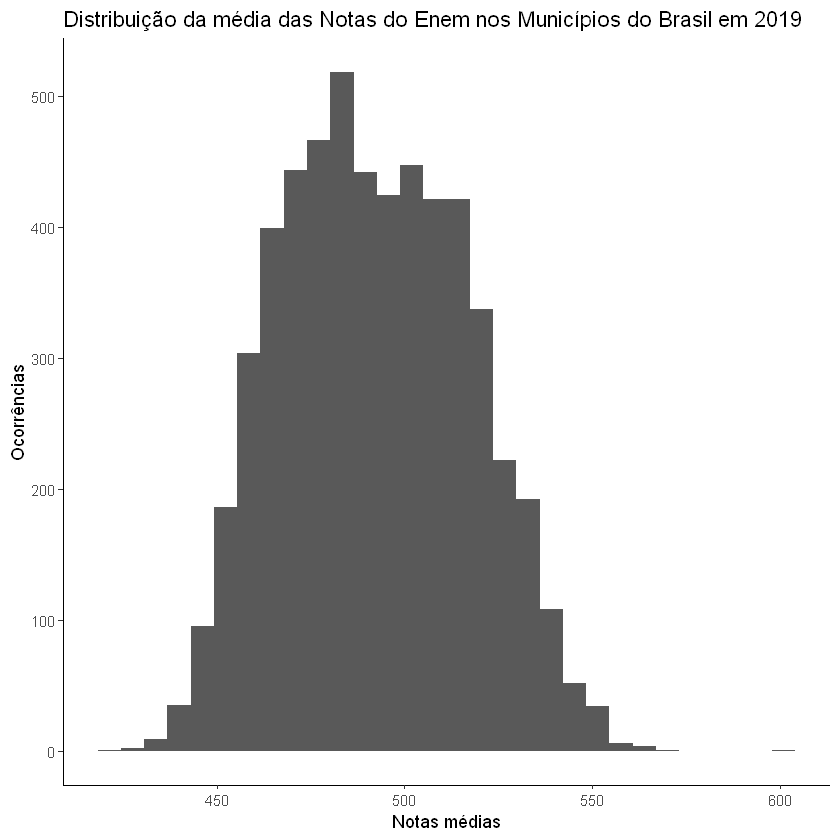

In [14]:
ggplot(data = complete_data_with_totalnet) + aes(mean_grades_group_cities) + geom_histogram() +
    xlab("Notas médias") + ylab("Ocorrências") + 
    ggtitle("Distribuição da média das Notas do Enem nos Municípios do Brasil em 2019") + theme_classic()

#### Análise de Assimetria - Skewness

In [15]:
library(e1071)
round(skewness(x = complete_data_with_totalnet$mean_grades_group_cities),digits = 3)

[1] 0.155

#### Teste de Aderência à Normalidade - Shapiro-Francia

In [16]:
library(nortest)

In [17]:
sf.test(complete_data_with_totalnet$mean_grades_group_cities[1:5000])


	Shapiro-Francia normality test

data:  complete_data_with_totalnet$mean_grades_group_cities[1:5000]
W = 0.98841, p-value < 2.2e-16


###### Apesar do histograma da variável da média de notas 'mean_grades_group_cities' apresentar um comportamento centralizado com mean = 492.204 e desvio padrão = 24.698 e com o índice de skewness (simetria) em torno de 0.155 (indicação de considerável assimetria), o teste de aderência a normalidade (Shapiro-Francia) NÃO FALHOU pela rejeição da hipótese nula H0, indicando possível não aderência à distribuição normal dos dados das médias das notas do Enem 2019, possivelmente afastando o comportamento que 68.2% das notas médias do enem estariam distribuídos em + / - 24.698 pontos do valor da média (492.204) 

#### Box Plot dos dados das Notas do Enem:

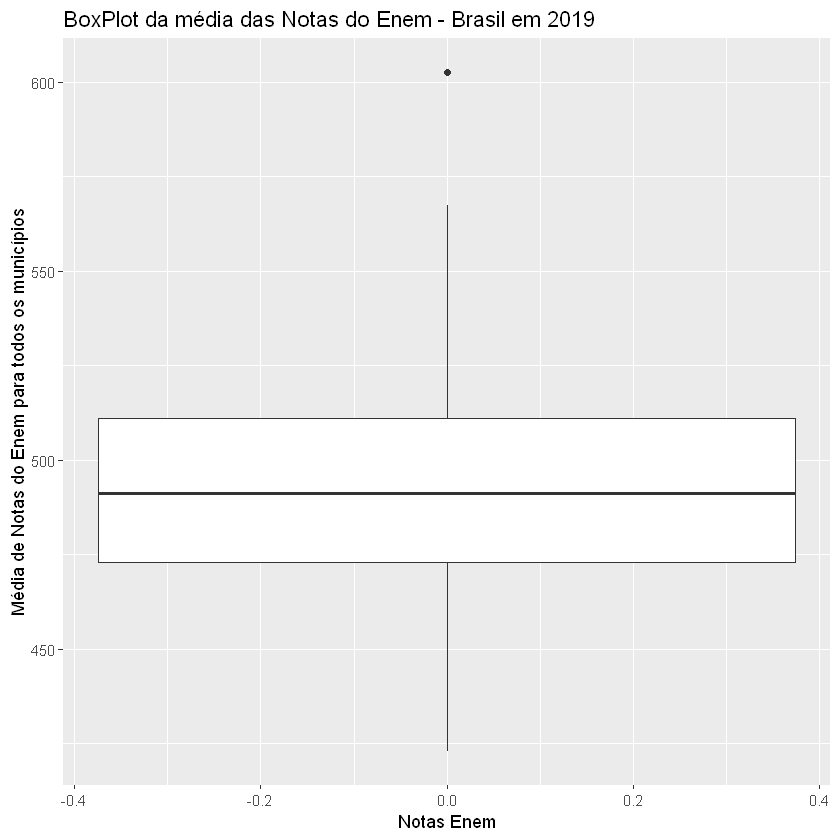

In [18]:
ggplot(data = complete_data_with_totalnet) + aes(y=mean_grades_group_cities) + geom_boxplot() +
    xlab("Notas Enem") + ylab("Média de Notas do Enem para todos os municípios") + 
    ggtitle("BoxPlot da média das Notas do Enem - Brasil em 2019") 

##### No diagrama de BoxPlot acima, com todos os municípios e UFs unificados numa única plotagem,  confere-se a distribuição da média das notas do Enem-2019 nos municípios concentrados em maior quantidade entre o primeiro e terceiro quartil { 1Q : 472.9 e 3Q : 511.1) respectivamente. Assim o range "R" entre estas duas referências (25% - 75%) da distribuição será de  (Q3-Q1)= 38.2 . Com a média das notas nos municípios variando entre o mínimo de 492.91 ao máximo de 602.625,  o boxplot unificado pode induzir a uma desinteressante dedução de baixa desigualdade entre as médias das notas no Enem.  

#### Qual será o efeito plástico induzido aos nossos olhares na construção de um box-plot de notas agrupados pelas Unidades Federativas ? 

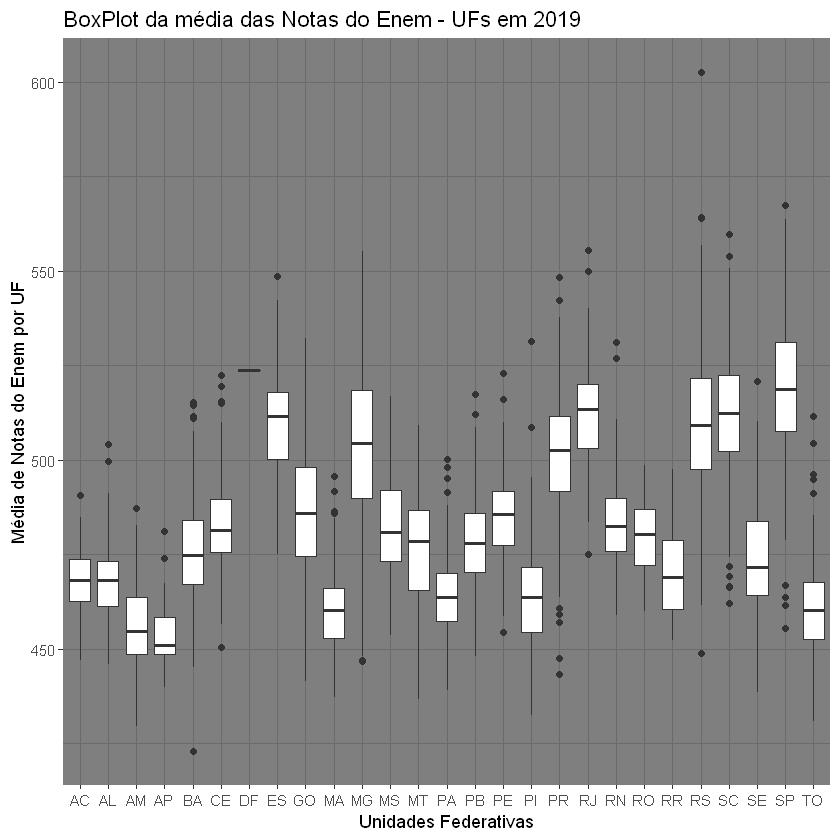

In [19]:
ggplot(data = complete_data_with_totalnet) + aes(x = UF, y=mean_grades_group_cities) + geom_boxplot() +
    xlab("Unidades Federativas") + ylab("Média de Notas do Enem por UF") + 
    ggtitle("BoxPlot da média das Notas do Enem - UFs em 2019") + theme_dark()

##### Agora no segundo box-plot, da percepção sobre a existência da desigualdade entre as médias das notas do Enem agrupados pelos Entes Federativos,  poderá aflorescer tal desconfiança sob o plástico desnível apresentado entre as caixinhas acima. Para a UF de São Paulo a caixa branca (Q1-Q3)  se sobrepõe sob a linha vertical correspondente a média das notas em 550. Logo ao lado, a UF de Tocantis, tem seu corpo "Q1-Q3" com os valores médios das notas situados entre 450 e 475 pontos. A impressão visual da desigualdade da média entre as UFs está construída.  Agora resta algumas veridicções sob o aspecto da significância estatística para a diferença das médias entre as UFs.

### Teste Estatístico "T"  para a averiguação da Diferença das médias das Notas do Enem entre UFs:
##### Considerando as médias amostrais para as UFs de São Paulo (SP) e Tocantis(TO)

In [20]:
# Selecionando a media das avaliações para todos os municipios das UFS: SP e TO
grades_sp = complete_data_with_totalnet %>%
                filter(UF == "SP") %>%
                select(mean_grades_group_cities) %>%
                data.frame()
grades_to = complete_data_with_totalnet %>%
                filter(UF == "TO") %>%
                select(mean_grades_group_cities) %>%
                data.frame()

In [21]:
t.test(x = sample(grades_sp$mean_grades_group_cities, size = 139), y = grades_to$mean_grades_group_cities)


	Welch Two Sample t-test

data:  sample(grades_sp$mean_grades_group_cities, size = 139) and grades_to$mean_grades_group_cities
t = 29.979, df = 258.83, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 52.72170 60.13458
sample estimates:
mean of x mean of y 
 517.8561  461.4279 


###### Acima, o resultado do teste T para amostras das médias das notas do Enem para as UFs de SP e TO indica uma medida estatisticamente significativa pela rejeição da hipótese nula.  Rejeita-se a hipótese de igualdade das médias aritméticas, reforçando a percepção de desigualdades da média das notas do Enem conforme o BoxPlot por UFs.

## Análise  Espacial das Notas do Enem no Território Brasileiro

Com o uso de arquivos do tipo "Shape Files" coletados na base de dados públicos do IBGE, foi desenvolvido código em linguagem R (04_processed_shape_municipios.R) para o processameno dos dados espaciais. Os dados das notas médias do Enem foram agregados aos dados espaciais (shape_files) resultando na geração do respectivo mapa de localidades e Notas Médias do Enem:  

#### Mapa de Notas do Enem 2019 (referência aos valores médios por municípios no Brasil)
![image](data/shape_maps/04_shape_map_enem.jpeg)

No mapa acima tem-se a representação visual da média de notas do Enem 2019 para os municípios do Brasil. Conforme a indicação do histograma e legenda de suporte ao mapa de notas confere-se maior concentração de municípios com valores da média das Notas do Enem mais elevados nas regiões sudeste e sul do Brasil. 


## Comportamento da variável - Densidade da Internet fixa por municípios:

#### Média Aritmética da densidade de todos os municípios

In [23]:
round(mean(x = complete_data_with_totalnet$densidade_total_internet_fixa), digits = 3)

[1] 1373.061

#### Desvio Padrão da densidade da internet em todos os municípios

In [24]:
round(x = sd(complete_data_with_totalnet$densidade_total_internet_fixa), digits = 3)

[1] 10378.16

#### Valor máximo da densidade da internet no Brasil em nível Municipal

In [25]:
round(x = max(complete_data_with_totalnet$densidade_total_internet_fixa), digits = 3)

[1] 438397

#### Valor mínimo da densidade da internet no Brasil em nível Municipal

In [26]:
round(x = min(complete_data_with_totalnet$densidade_total_internet_fixa), digits = 3)

[1] 0

#### Município com a maior densidade de acesso a internet do Brasil em 2019

In [27]:
complete_data_with_totalnet %>%
    filter(densidade_total_internet_fixa == 438397)

cod_municipio_ibge,NO_MUNICIPIO_RESIDENCIA,UF,fibra_optica,wifi,ethernet,lte,vsatelite,wimax,plc_eletrico,...,fr_frame_relay,mmds,densidade_total_internet_fixa,remuneracao_media,desvio_padrao,gini,pib,pib_p_capta,media_idhm,mean_grades_group_cities
3106200,Belo Horizonte,MG,0,0,0,5006,0,0,0,...,0,0,438397,1918.43,3207.83,0.487,97205324544,38695.31,0.6678781,550.2264


#### Municípios com a menor densidade de acesso a internet do Brasil em 2019

In [28]:
complete_data_with_totalnet %>%
    filter(densidade_total_internet_fixa == 0)

cod_municipio_ibge,NO_MUNICIPIO_RESIDENCIA,UF,fibra_optica,wifi,ethernet,lte,vsatelite,wimax,plc_eletrico,...,fr_frame_relay,mmds,densidade_total_internet_fixa,remuneracao_media,desvio_padrao,gini,pib,pib_p_capta,media_idhm,mean_grades_group_cities
1100346,Alvorada D'Oeste,RO,0,0,0,0,0,0,0,...,0,0,0,2030.28,5653.47,0.472,260347872,18065.91,0.6440385,479.1831
1200054,Assis Brasil,AC,0,0,0,0,0,0,0,...,0,0,0,1855.13,2515.53,0.559,93054149,12546.06,0.5860909,472.3420
1300904,Canutama,AM,0,0,0,0,0,0,0,...,0,0,0,1515.28,2190.77,0.566,125866946,8053.42,0.5651129,459.1896
1301951,Itamarati,AM,0,0,0,0,0,0,0,...,0,0,0,1515.28,2190.77,0.566,102297688,13029.89,0.5651129,443.5782
1302702,Manicoré,AM,0,0,0,0,0,0,0,...,0,0,0,1515.28,2190.77,0.566,543050642,9740.64,0.5651129,458.9114
1500347,Água Azul do Norte,PA,0,0,0,0,0,0,0,...,0,0,0,1505.31,2204.90,0.528,434587607,15843.51,0.5815455,460.2354
1500701,Anajás,PA,0,0,0,0,0,0,0,...,0,0,0,1505.31,2204.90,0.528,214508437,7326.86,0.5815455,451.5909
1500909,Augusto Corrêa,PA,0,0,0,0,0,0,0,...,0,0,0,1505.31,2204.90,0.528,326462848,7097.33,0.5815455,462.4356
1501451,Belterra,PA,0,0,0,0,0,0,0,...,0,0,0,1505.31,2204.90,0.528,164294669,9265.43,0.5815455,463.6934
1501758,Brejo Grande do Araguaia,PA,0,0,0,0,0,0,0,...,0,0,0,1505.31,2204.90,0.528,81834987,11088.75,0.5815455,464.8467


Há considerável quantidade de municípios com a densidade de acessos fixos à internet em banda larga iguais à 0 (ZERO),  para o ano de 2019. Tal fato não garante que a densidade do acesso à internet fixa em tais municípios sejam realmente iguais à ZERO. Há situações de municípios que não tiveram seus dados registrados naquele período. 

### Análise da Distribuição da variável - Densidade da Internet fixa por municípios:

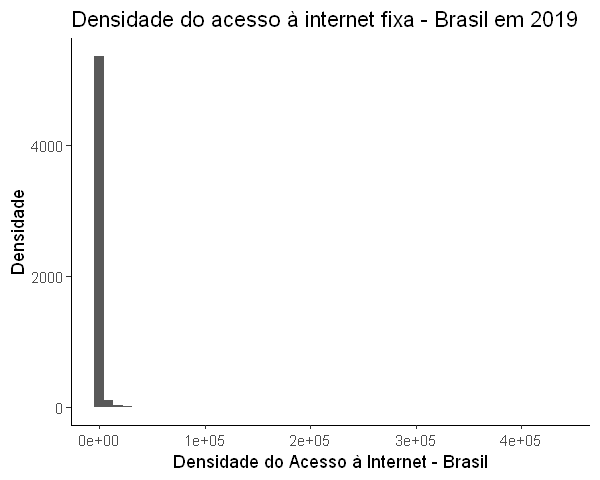

In [29]:
options(repr.plot.width= 5, repr.plot.height=4)
ggplot(data = complete_data_with_totalnet) + aes(densidade_total_internet_fixa) + geom_histogram(bins = 50) +
    xlab("Densidade do Acesso à Internet - Brasil") + ylab("Densidade") + 
    ggtitle("Densidade do acesso à internet fixa - Brasil em 2019") + theme_classic()

In [30]:
round(skewness(x = complete_data_with_totalnet$densidade_total_internet_fixa),digits = 3)

[1] 23.618

Tanto o histograma quanto o valor de Skewness indicam que os dados são assimétricos e distribuídos para a direita.

#### Acesso a internet fixa no Brasil por tecnologia no ano de 2019:

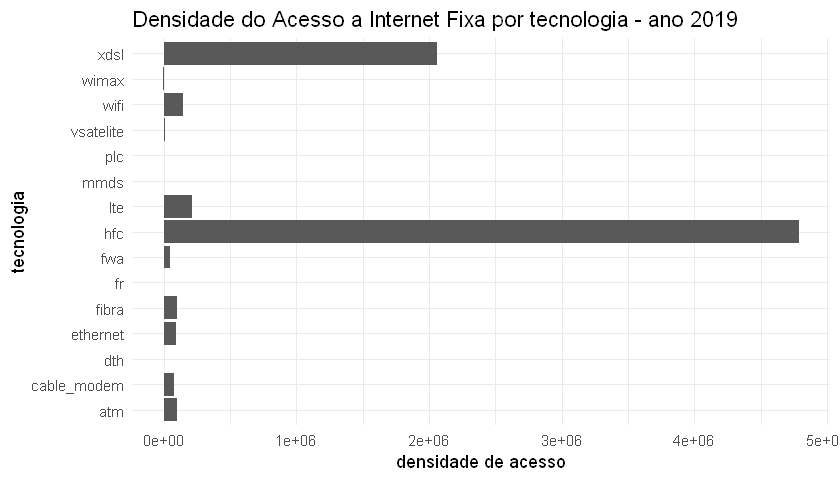

In [118]:
net_by_access = complete_data_with_totalnet %>%
                    summarise(fibra = sum(fibra_optica),
                    wifi = sum(wifi),
                    ethernet = sum(ethernet),
                    lte = sum(lte),
                    vsatelite = sum(vsatelite),
                    wimax = sum(wimax),
                    plc = sum(plc_eletrico),
                    xdsl = sum(xdsl),
                    cable_modem = sum(cable_modem),
                    fwa = sum(fwa_5g_fixed),
                    atm = sum(atm_backbone),
                    dth = sum(dth_satelite),
                    hfc = sum(hfc_tv_cabo),
                    fr = sum(fr_frame_relay),
                    mmds = sum(mmds)
                    ) %>%
                    data.frame()
# Criando o data frame com os quantitativos de acessos a internet para todo o território nacional
col_names_access = c('fibra', 'wifi', 'ethernet', 'lte', 'vsatelite',
                                'wimax', 'plc', 'xdsl', 'cable_modem', 'fwa',
                                'atm', 'dth', 'hfc', 'fr', 'mmds')
density = c()
for(value in col_names_access){
    density = append(x = density, values = net_by_access[1, value])
}
net_by_access = data.frame(access = col_names_access,
                           density = density)
# plotando as barras:
ggplot(net_by_access) + aes(x = access, y = density) + geom_bar(stat = "identity") + coord_flip() + theme_minimal() +
    xlab("tecnologia") + ylab("densidade de acesso") + ggtitle("Densidade do Acesso a Internet Fixa por tecnologia - ano 2019") 

#### Boxplot agregados por Unidade Federativa

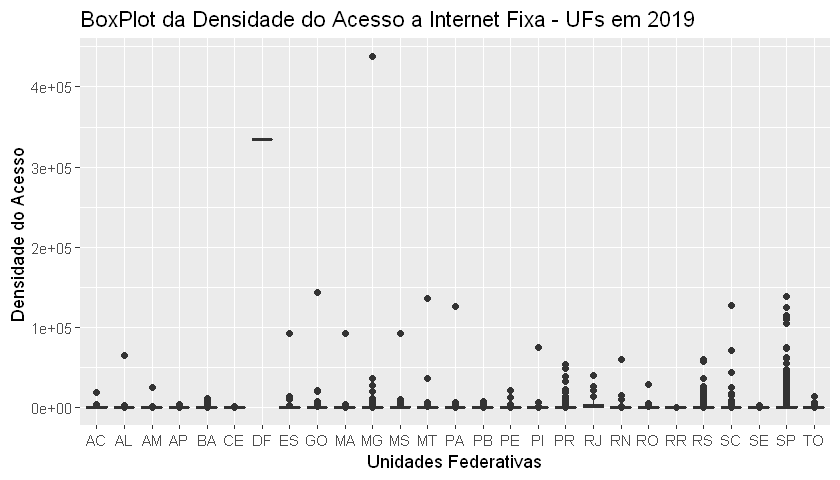

In [33]:
options(repr.plot.width= 7, repr.plot.height=4)
ggplot(data = complete_data_with_totalnet) + aes(x = UF, y=densidade_total_internet_fixa) + geom_boxplot() +
    xlab("Unidades Federativas") + ylab("Densidade do Acesso ") + 
    ggtitle("BoxPlot da Densidade do Acesso a Internet Fixa - UFs em 2019")

### Mapa de da Densidade do Acesso à internet Fixa 2019

![image](data/shape_maps/04_shape_map_densidade_total_internet.jpeg)

Acima, O Mapa ShapeFile contendo todos os municípios do Brasil quando associado a densidade do acesso fixo a internet no âmbito municipal,  possui referência bem diferenciada quando comparado com o mapa das notas do Enem. Neste , grande parte do território Nacional é indicado com uma baixa densidade do acesso. 

Outra forma de combinação do mapa shapeFile com os dados de acesso à internet fixa, será reduzindo e integrando por soma a distribuição das densidades para cada UF. Agora o mapa unificado por UFs possui a seguinte distribuição das densidades:

![image](data/shape_maps/04_shape_map_internet_access_total_by_uf.jpeg)

Há agora maior semelhança visual das indicações das intensidades entre o mapa da densidade do acesso a internet fixa unificado por UF e o mapa de distribuição nacional das notas do Enem.

No estudo da correlação numérica entre as notas do Enem e a densidade da internet fixa, a redução por soma dos dados da densidade do acesso à internet por UF teria melhores resultados como ocorreu na visualização dos shapeFiles ?

### Estudo da Correlação Linear entre as Notas do Enem e os Dados de Acesso a Internet Fixa no Brasil, ano 2019:

In [119]:
library(PerformanceAnalytics)

#### Scatter plot entre os dados da Densidade da Internet Fixa E a média das notas do Enem

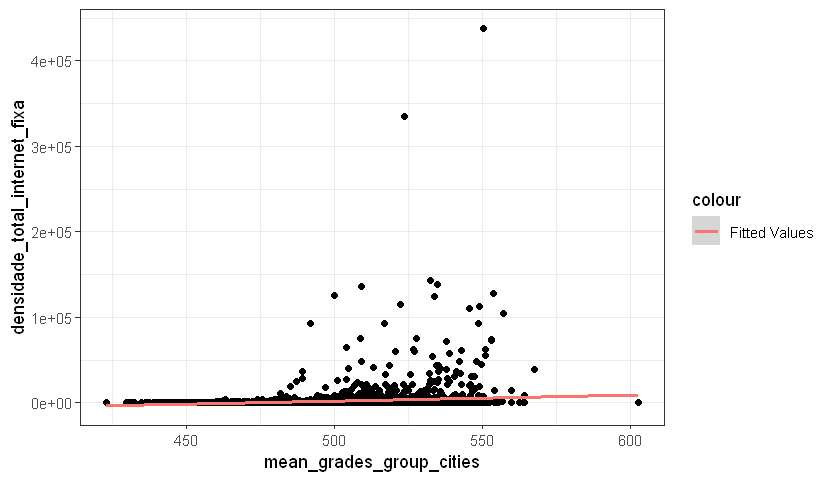

In [145]:
ggplot(data = complete_data_with_totalnet) + aes(x = mean_grades_group_cities, 
    y= densidade_total_internet_fixa) + 
    geom_point() + geom_smooth(aes(color="Fitted Values"), method = "lm", level = 0.95) + 
    theme_bw()

No gráfico de Scatter Plot acima tem-se no eixo da Abcissa a distribuição da média das notas do Enem e na Ordenada: a Densidade total da Internet Fixa para cada município. O gráfico revela baixa relação linear entre as variáveis. 
Na aplicação do fit linear a relação, observe que as linhas estão não alinhadas com a respectiva distribuição para o intervalo de confiança igual a 95%.

#### Índice de correlação PEARSON entre as variáveis: Média das Notas do Enem e Densidade do Acesso a Internet Fixa.

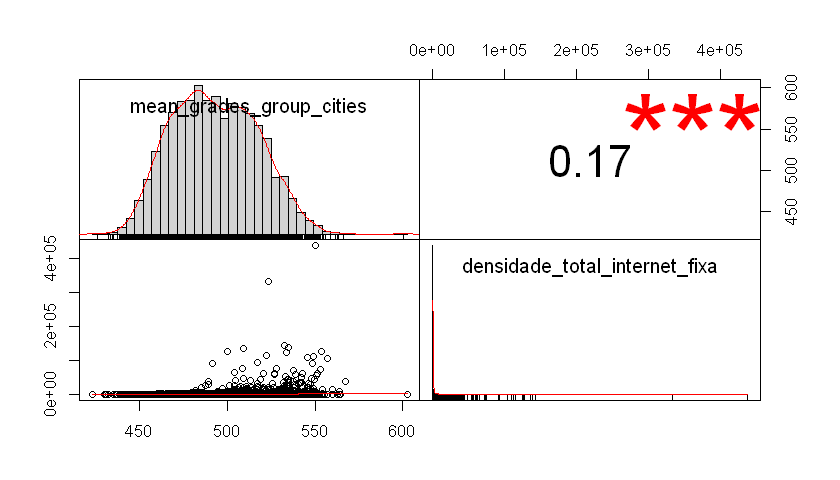

In [37]:
chart.Correlation(complete_data_with_totalnet[c("mean_grades_group_cities", "densidade_total_internet_fixa")],
    method= "pearson")

In [38]:
cor.test(complete_data_with_totalnet$densidade_total_internet_fixa, complete_data_with_totalnet$mean_grades_group_cities)


	Pearson's product-moment correlation

data:  complete_data_with_totalnet$densidade_total_internet_fixa and complete_data_with_totalnet$mean_grades_group_cities
t = 12.659, df = 5568, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1416233 0.1926800
sample estimates:
      cor 
0.1672638 


Embora o índice de correlação Pearson entre a média das notas do Enem e a densidade de acesso a internet seja baixa: 
r = 0.167, para a correlação linear, o Teste de Correlação realizado indicou Rejeição à hipótese nula, onde o índice de correlação é diferente de 0 (ZERO).

#### Índice de correlação SPEARMAN entre as variáveis: Média das Notas do Enem e Densidade do Acesso a Internet Fixa.

Warning message in cor.test.default(as.numeric(x), as.numeric(y), method = method):
"Cannot compute exact p-value with ties"

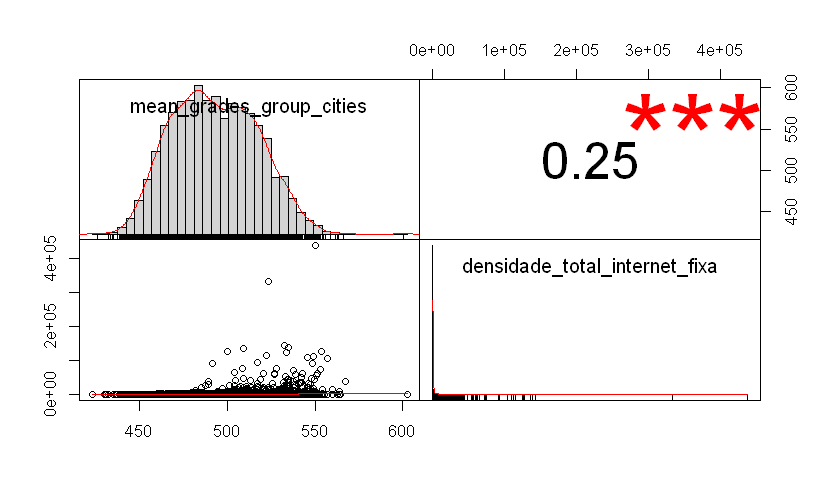

In [39]:
chart.Correlation(complete_data_with_totalnet[c("mean_grades_group_cities", "densidade_total_internet_fixa")],
    method= "spearman")

In [40]:
cor.test(complete_data_with_totalnet$densidade_total_internet_fixa, complete_data_with_totalnet$mean_grades_group_cities,
    method = "spearman")

Warning message in cor.test.default(complete_data_with_totalnet$densidade_total_internet_fixa, :
"Cannot compute exact p-value with ties"


	Spearman's rank correlation rho

data:  complete_data_with_totalnet$densidade_total_internet_fixa and complete_data_with_totalnet$mean_grades_group_cities
S = 2.1627e+10, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.2491091 


Para o índice de Correlação Spearman o valor de Rho registrado foi de 0.249. Indicando um índice maior se comparado ao de pearson, já que o índice spearman tem resposta diferenciada a relações não lineares.

### Análise da correlação existente entre os dados da internet fixa e as notas do enem no ano de 2019 - Dados de densidade de acessos a internet reduzidos por soma e agrupados por UF:

#### Agrupamento dos Dados totais de acesso a internet por UF:

In [129]:
complete_data_with_totalnet_by_uf = complete_data_with_totalnet %>%
    group_by(UF) %>%
    summarise(  fibra_by_uf = sum(fibra_optica),
                wifi_by_uf = sum(wifi),
                ethernet_by_uf = sum(ethernet),
                lte_by_uf = sum(lte),
                vsatelite_uf = sum(vsatelite),
                wimax_uf = sum(wimax),
                plc_uf = sum(plc_eletrico),
                xdsl_uf = sum(xdsl),
                cable_modem_uf = sum(cable_modem),
                fwa_uf = sum(fwa_5g_fixed),
                atm_uf = sum(atm_backbone),
                dth_uf = sum(dth_satelite),
                hfc_uf = sum(hfc_tv_cabo),
                fr_uf = sum(fr_frame_relay),
                mmds_uf = sum(mmds),
                densidade_internet_total_uf = sum(densidade_total_internet_fixa)) %>%
    right_join(y = complete_data_with_totalnet, by = "UF") %>%
    select(cod_municipio_ibge, NO_MUNICIPIO_RESIDENCIA, UF,fibra_by_uf, wifi_by_uf, ethernet_by_uf, 
        lte_by_uf, vsatelite_uf, wimax_uf, plc_uf, xdsl_uf,
        cable_modem_uf, fwa_uf, atm_uf, dth_uf, hfc_uf, fr_uf, mmds_uf, densidade_internet_total_uf,
        remuneracao_media, desvio_padrao, gini, pib, 
        pib_p_capta, media_idhm, mean_grades_group_cities)
    data.frame()

<0 x 0 matrix>

In [130]:
str(complete_data_with_totalnet_by_uf)

tibble [5,570 x 26] (S3: tbl_df/tbl/data.frame)
 $ cod_municipio_ibge         : int [1:5570] 1200013 1200054 1200104 1200138 1200179 1200203 1200252 1200302 1200328 1200336 ...
 $ NO_MUNICIPIO_RESIDENCIA    : Factor w/ 5299 levels "Abadia de Goiás",..: 27 396 709 751 1021 1411 1600 1675 2496 2766 ...
 $ UF                         : Factor w/ 27 levels "AC","AL","AM",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ fibra_by_uf                : num [1:5570] 77 77 77 77 77 77 77 77 77 77 ...
 $ wifi_by_uf                 : num [1:5570] 578 578 578 578 578 578 578 578 578 578 ...
 $ ethernet_by_uf             : num [1:5570] 599 599 599 599 599 599 599 599 599 599 ...
 $ lte_by_uf                  : num [1:5570] 0 0 0 0 0 0 0 0 0 0 ...
 $ vsatelite_uf               : num [1:5570] 12 12 12 12 12 12 12 12 12 12 ...
 $ wimax_uf                   : num [1:5570] 0 0 0 0 0 0 0 0 0 0 ...
 $ plc_uf                     : num [1:5570] 0 0 0 0 0 0 0 0 0 0 ...
 $ xdsl_uf                    : num [1:5570] 11961 11961 119

#### Índice de correlação PEARSON entre as variáveis: Média das Notas do Enem e Densidade do Acesso a Internet agrupados por UF

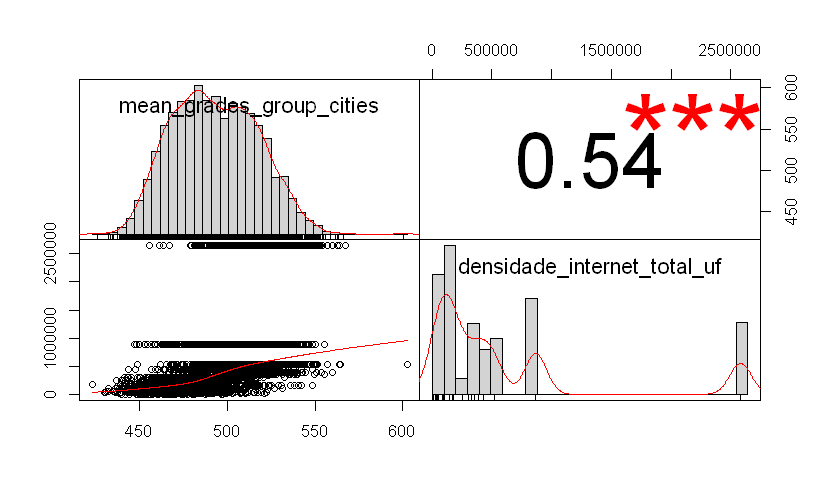

In [131]:
chart.Correlation(complete_data_with_totalnet_by_uf[c("mean_grades_group_cities", "densidade_internet_total_uf")],
    method= "pearson")

#### Índice de correlação SPEARMAN entre as variáveis: Média das Notas do Enem e Densidade do Acesso a Internet agrupados por UF

Warning message in cor.test.default(as.numeric(x), as.numeric(y), method = method):
"Cannot compute exact p-value with ties"

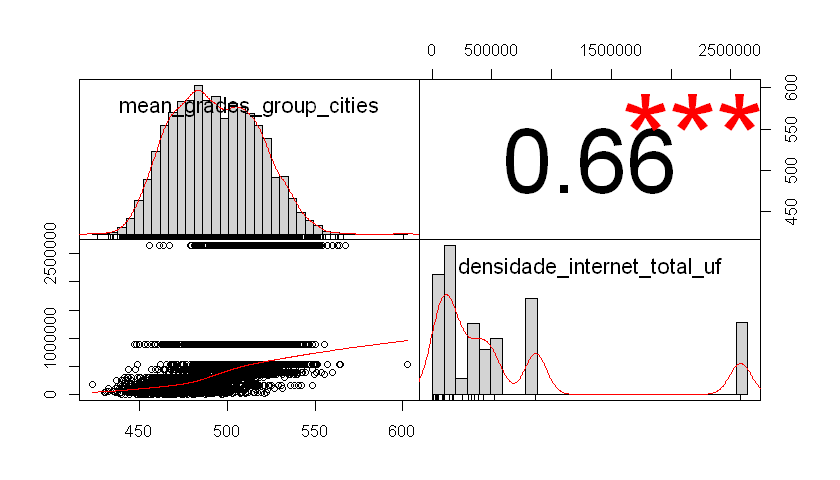

In [128]:
chart.Correlation(complete_data_with_totalnet_by_uf[c("mean_grades_group_cities", "densidade_internet_total_uf")],
    method= "spearman")

### Scatter plot entre os dados da Densidade da Internet agrupados por UF e a média das notas do Enem

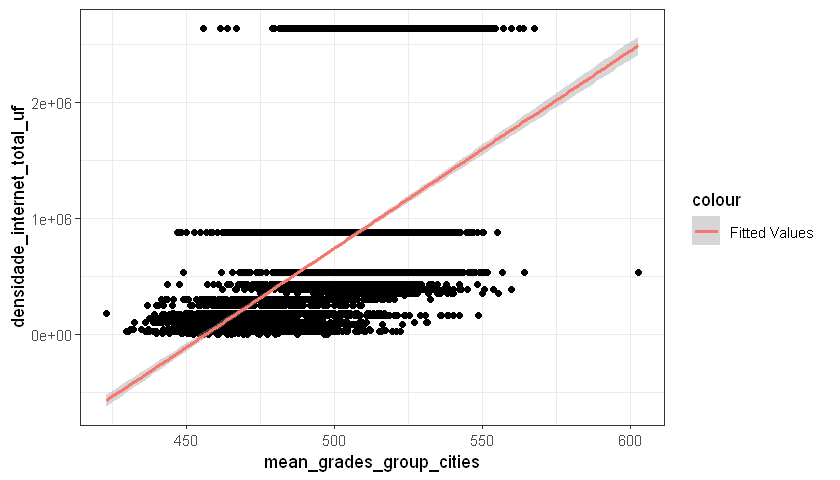

In [146]:
ggplot(data = complete_data_with_totalnet_by_uf) + aes(x = mean_grades_group_cities, 
    y= densidade_internet_total_uf) + 
    geom_point() + geom_smooth(aes(color="Fitted Values"), method = "lm", level = 0.95) + 
    theme_bw()

### Fim do caderno 2